# Unsupervise learning

## Load final Dataset

In [76]:
from numpy import loadtxt
import os 

print(os.chdir("../final"))
print(os.getcwd())
X_final = loadtxt('data.csv', delimiter=',')
X_final

None
C:\Users\ACER\Desktop\text-classification\data\final


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05400359, 0.17623931, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Models

### KMeans

* https://en.wikipedia.org/wiki/K-means_clustering
* https://www.researchgate.net/publication/271616608_A_Clustering_Method_Based_on_K-Means_Algorithm
* 


K-Means is an iterative algorithm that tries to cluster the given dataset into k number of clusters and maximize the similarity between data points and their respective cluster centroid.

This algorithm was proposed by Stuart Lloyd at the Bell Labs in 1957 but it was not published outside of the company until 1982. It was also proposed by Edward W. Forgy in 1965. Hence, K-Means is sometimes referred to as Lloyd-Forgy algorithm. 

**Algorithm**

The algorithm for K-Means clustering is written below:

1. Specify the number of clusters K.
2. Initialize the cluster centroids by randomly sampling data points from the dataset.

3. Compute the distance between each point and each cluster centroids. 

$$ distance = \|x_i - \bar{c}_k \| $$

4. Assign each point to the closest cluster centroid (minimum distance).

5. Compute the new cluster centroid for each cluster by taking the mean of all the data points in that cluster.
6. Repeat step 3-5 until there is no change in the cluster centroids.

*Note: Initialization (Step 2) can also be done by randomly sampling the centroids from the range of the data.*

The objective of the K-Means clustering algorithm is to minimize the following objective function i.e. Sum of Squared Errors (SSE).

$$
SSE = \sum_{k=1}^K \sum_{x_i \in c_k} \|x_i - \bar{c}_k \|^2
$$
where,   
* $K$ is the number of clusters

* $x_i$ is the $i^{th}$ data point and

* $c_k$ is the set of points in the $k^{th}$ cluster

* $\bar{c}_k$ is the centroid of $k^{th}$ cluster




**No of cluster analysis**

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def elbowplot(data):
    inertia = []
    for n in range(1 , 11):
        algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                            tol=0.0001,  random_state= 111  , algorithm='elkan') )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(1 , 11) , inertia , 'o')
    plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


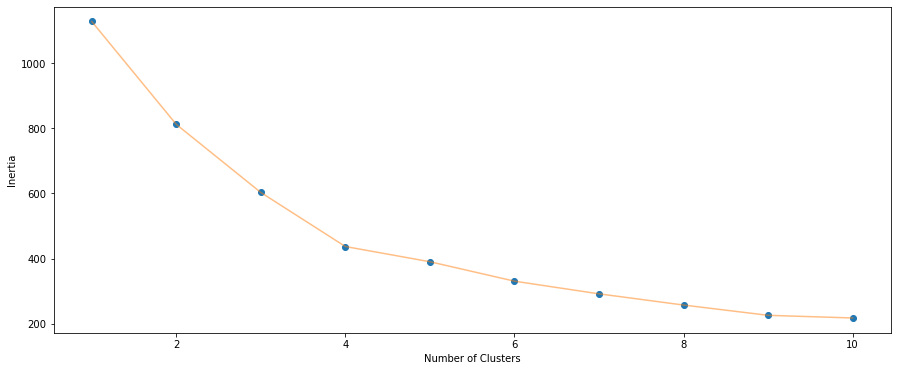

In [81]:
elbowplot(X_final)

**Train model**

In [26]:
true_k = 2
k_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
k_model.fit(X_final)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [20]:
order_centroids = k_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :100]:
        print(f"{terms[ind]}")

Cluster 0:
404
server
litespeed
web
terection
dysfunction
viagra
requested
infections
health
site
page
resource
cialis
tmale
enhancement
erectile
technologies
advised
proudly
powered
company
control
content
35
hosting
disease
obstructive
asthma
tchronic
pulmonary
terectile
super
ed
95
facebook
forbidden
403
log
blood
female
tabs
pharmacy
anti
soft
bacterial
libido
pressure
spam
professional
active
care
loss
usd
50
45
65
en
15
55
plesk
phishing
2021
view
mobile
access
accept
denied
continue
cookies
36
credit
support
policy
unsubscribe
order
25
service
offer
time
stop
desktop
sugar
24
customer
weight
12
limited
pattern
pink
smoking
glucophage
bactrim
labialis
antidiabetic
antiviral
gbp
anxiety
diarrhea
aud
Cluster 1:
suspended
account
provider
information
hosting
contact
mas
contacta
proveedor
información
tu
para
server
powered
infections
resource
requested
site
company
log
blood
usd
terection
45
dysfunction
pink
active
order
credit
2021
40
allow
support
15
loss
forbidden
erectile
access

**PCA- analysis of cluster**

In [67]:
def cluster_region_plot(X,n):

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02 # point in the mesh [x_min, x_max]x[y_min, y_max].



    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model(c_)
    algorithm,labels,centroids=kmeans(X,n)
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


    plt.figure(1 , figsize = (15 , 7) )
    plt.clf()
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.imshow(Z , interpolation='nearest', 
            extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
            cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
    plt.title('K-means clustering plot')
    plt.show()

In [68]:
##### PCA analysis
from sklearn.decomposition import PCA


lower_dims_data = PCA(n_components=2).fit_transform(X_final)
plot_df = pd.DataFrame(lower_dims_data, columns=['pca1','pca2'])


plot_df.head()

,pca1,pca2
0,-0.088346,0.054866
1,-0.067648,0.077869
2,-0.131038,0.027372
3,-0.231642,0.816461
4,-0.068959,0.076357


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


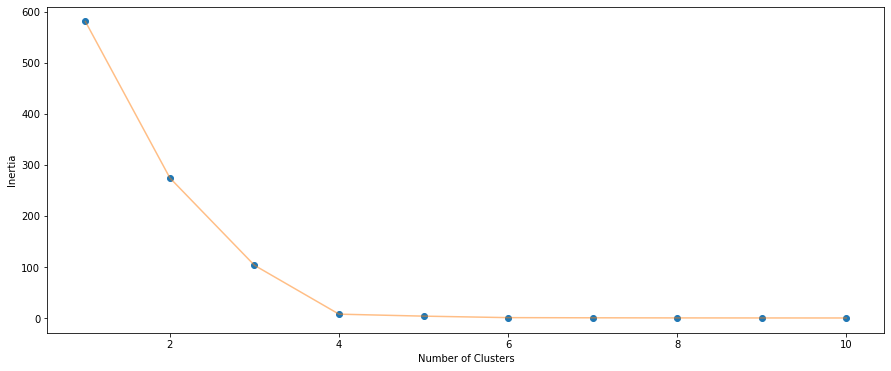

In [69]:
# attendance and percent_activity
XPCA = plot_df[['pca1' , 'pca2']].iloc[: , :].values
elbowplot(XPCA)

In [70]:
algorithm,labels,centroids=kmeans(XPCA,2)
PCAdata = plot_df.copy()
PCAdata['Kmeans label'] = algorithm.labels_
PCAdata.head()

,pca1,pca2,Kmeans label
0,-0.088346,0.054866,0
1,-0.067648,0.077869,0
2,-0.131038,0.027372,0
3,-0.231642,0.816461,0
4,-0.068959,0.076357,0


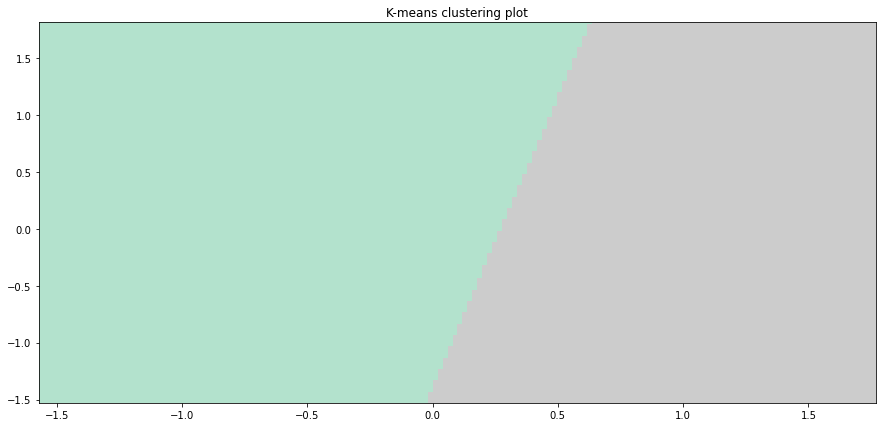

In [71]:
cluster_region_plot(XPCA,2)

In [72]:
import seaborn as sns

def cluster_region_and_cluster_labels_plot(X,x_axis,y_axis,new_data,pallet):

    plot_df = pd.DataFrame(X, columns=[x_axis,y_axis])

    h = 0.02

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model(c_)
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(1 , figsize = (15 , 7) )
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
    sns.scatterplot(x=x_axis, y=y_axis, hue=new_data,data=plot_df,s=80, palette=pallet)
    plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
    plt.title('K-means clustering plot')
    plt.show()

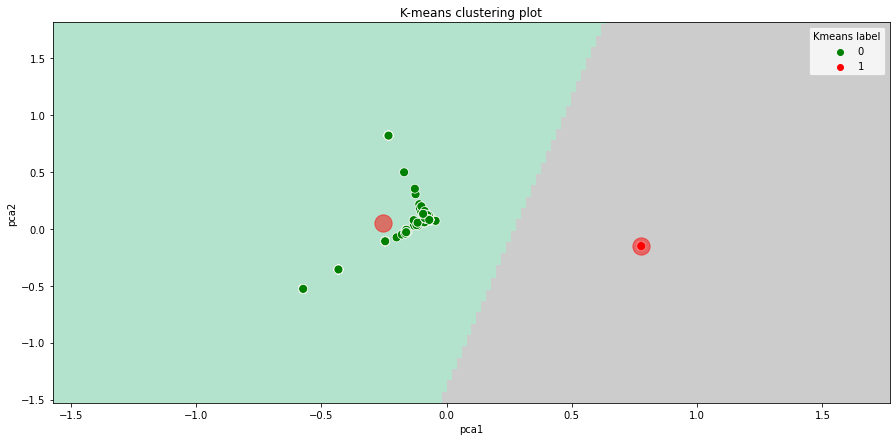

In [73]:
cluster_region_and_cluster_labels_plot(XPCA,'pca1','pca2',PCAdata['Kmeans label'],['Green','Red'])


**TSNE-plot**

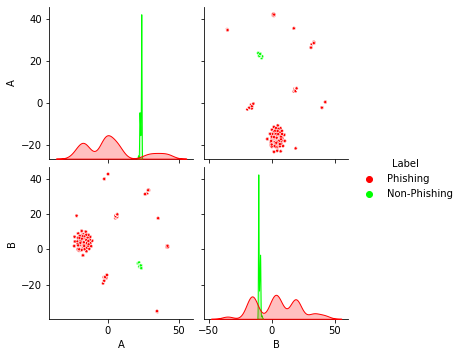

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


tsne = TSNE().fit_transform(X=X,)
tsne = pd.DataFrame(tsne, columns=['A', 'B'])

label = [c for c in k_model.labels_]
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(0, 'Phishing')

data["Label"] = data["Label"].replace(1, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

In [49]:
def kmeans(data,n):

    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                            tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(data)
    labels = algorithm.labels_
    centroids = algorithm.cluster_centers_

    return algorithm,labels,centroids

##### The Silhouette Index

a. The first one is something called the silhouette index. The silhouette index of a point gives a measure of how close a point is to other points in its cluster, and how far away it is from points in the other clusters.

The silouette index for a point is given by $s = 1 - \frac{a}{b}$, where $a$ is its average distance to points in its cluster, and $b$ is its average distance from its nearest neighboring cluster. Typically, $a$ is smaller than $b$, and the silhouette index falls between $0$ and $1$. If $a>b$, we use $s = \frac{b}{a} - 1$. That is, we can condense our formula into $s = \frac{b-a}{max(a,b)}$. You can then average the silhouette index across all points to find the silhouette index for all of the points. 

Generally, dense and well separated clusters result in a silhouette index that is close to 1. Values close to 0 indicate that the clusters have significant overlap, and values close to -1 indicate that the clustering has resulted in clusters that have are sparse and overlap with one another. 

In [51]:
from sklearn.metrics import silhouette_samples,silhouette_score


l=[2]
for i in l:
    algorithm,labels,centroids=kmeans(X_final,i)
    print('Silhouette_score when number of cluster n=%s is'%i,silhouette_score(X_final,labels, metric='euclidean'))



Silhouette_score when number of cluster n=2 is 0.3794073788292475


**Prediction**

In [22]:
def textscrapper_from_website(url):
    html = urllib.request.urlopen(url)  # if you are trying to extract from url
    
#     # Below two line code are for open local file and store in variable
#     # exact location need to be mentioned
#     HTMLFileToBeOpened = open(url,encoding="utf8")
#     # Reading the file and storing in a variable
#     html = HTMLFileToBeOpened.read()
    
    soup = BeautifulSoup(html,'html.parser')
    data = soup.get_text("|",strip=True) 
    data = data.split("|")    
    return data

In [23]:
def prediction(data):
    X = vectorizer.transform(data)
    predicted = k_model.predict(X)
    print(f"Prediction :{predicted}")

Some testing websites

* https://fusemachines.com/
* https://www.facebook.com/


In [28]:
data = textscrapper_from_website("https://fusemachines.com/")
data = [str(data)]
data

['[\'AI Services and AI Education \', \' Fusemachines\', \'AI Services\', \'Explore AI Services\', \'Data & AI Teams\', \'Data Teams\', \'AI Teams\', \'Data & AI Strategy\', \'Data Strategy\', \'AI Strategy\', \'Bespoke AI Solutions\', \'AI Education\', \'Explore AI Education\', \'For Enterprise\', \'Training Program\', \'AI Schools\', \'For Leadership\', \'For Engineers\', \'For Education Institutions\', \'AI Education Services\', \'For High Schools\', \'For Universities, Colleges and Community Colleges\', \'For Educators\', \'For Working Professionals\', \'For Governments\', \'Democratize AI\', \'Success Stories\', \'Insights\', \'About\', \'Careers\', \'Contact Us\', \'Democratize AI\', \'AI Services for Enterprise\', \'\', \'\', \'AI Education for All\', \'Schedule a conversation\', \'AI Services\', \'Data & AI Team\', \'Data & AI Strategy\', \'Bespoke AI Solutions\', \'AI Education\', \'For Enterprise\', \'For Education Institutions\', \'For Governments\', \'Trusted by\', \'View a

In [29]:
prediction(data)

Prediction :[0]


### AffinityPropagation

In [26]:
from sklearn.cluster import AffinityPropagation


a_model = AffinityPropagation(damping=0.9)
# fit the model
a_model.fit(X_final)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


AffinityPropagation(damping=0.9)

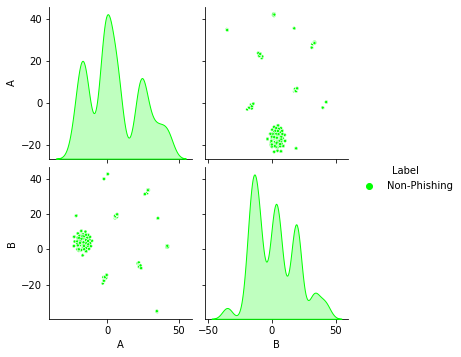

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


a_tsne = TSNE().fit_transform(X=X,)
a_tsne = pd.DataFrame(a_tsne, columns=['A', 'B'])

label = [c for c in a_model.labels_]
# print(unique(label))
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(1, 'Phishing')

data["Label"] = data["Label"].replace(-1, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

### Agglomerative Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = agglomerative_model.fit_predict(X_final)
# retrieve unique clusters
# clusters = unique(yhat)
# print(clusters)

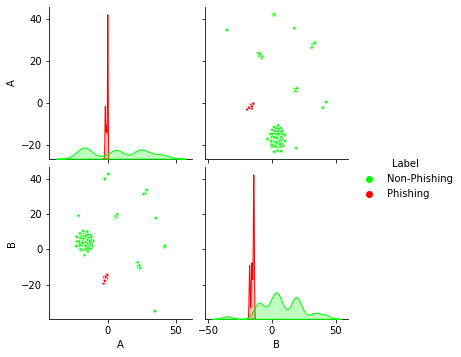

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


a_tsne = TSNE().fit_transform(X=X,)
a_tsne = pd.DataFrame(a_tsne, columns=['A', 'B'])

label = [c for c in agglomerative_model.labels_]
# print(unique(label))
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(1, 'Phishing')

data["Label"] = data["Label"].replace(0, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

### Brich

In [ ]:
from sklearn.cluster import Birch


brich_model = Birch(threshold=0.01, n_clusters=2)
# fit the model
brich_model.fit(X_final)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


a_tsne = TSNE().fit_transform(X=X,)
a_tsne = pd.DataFrame(a_tsne, columns=['A', 'B'])

label = [c for c in brich_model.labels_]
print(unique(label))
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(0, 'Phishing')

data["Label"] = data["Label"].replace(1, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

### DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X_final)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)

### Mini-Batch K-Means


In [ ]:
from sklearn.cluster import MiniBatchKMeans


mini_kmeans_model = MiniBatchKMeans(n_clusters=2)
# fit the model
mini_kmeans_model.fit(X)
# assign a cluster to each example
yhat = mini_kmeans_model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


a_tsne = TSNE().fit_transform(X=X,)
a_tsne = pd.DataFrame(a_tsne, columns=['A', 'B'])

label = [c for c in mini_kmeans_model.labels_]
print(unique(label))
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(0, 'Phishing')

data["Label"] = data["Label"].replace(1, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

### Mean Shift


In [ ]:
from sklearn.cluster import MeanShift

# define the model
mean_shift_model = MeanShift()
# fit model and predict clusters
yhat = mean_shift_model.fit_predict(X_final)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)

### OPTICS


In [ ]:
from sklearn.cluster import OPTICS

# define the model
optics_model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = optics_model.fit_predict(X_final)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)

### Spectral Clustering



In [ ]:
from sklearn.cluster import SpectralClustering


# define the model
spectral_model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = spectral_model.fit_predict(X_final)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


a_tsne = TSNE().fit_transform(X=X,)
a_tsne = pd.DataFrame(a_tsne, columns=['A', 'B'])

label = [c for c in spectral_model.labels_]
print(unique(label))
data = pd.DataFrame({'Label': label})

data["Label"] = data["Label"].replace(0, 'Phishing')

data["Label"] = data["Label"].replace(1, 'Non-Phishing')

tsne["Label"] = list(data["Label"]).copy()
colors = {'Phishing':'#FF0000', 
          'Non-Phishing':'#00FF00'}
sns.pairplot(tsne, hue='Label', diag_kind='kde', markers='.', palette=colors)
plt.show()

### Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture


gaussian_model = GaussianMixture(n_components=2)
# fit the model
gaussian_model.fit(X_final)
# assign a cluster to each example
yhat = gaussian_model.predict(X_final)
# retrieve unique clusters
clusters = unique(yhat)

print(clusters)

### Cosine similirity

**Approach**

* The basic idea is to create a label vector, which represents the 11(or according to your context) labels as vectors and calculate the cosine distance of each label (A) to the prediction text (B).

* The label with the highest similarity or is higher than a certain threshold will be assigned to the user rating.

![](https://miro.medium.com/max/875/0*Ace-yRqVl01k5onR)

# Text Classification Tools

## Open-source libraries

### [Text classification with python](https://monkeylearn.com/blog/text-classification-with-python/)
* I just love this API. It is similar to microsoft azure api. In which we pass the input and labels. Model train with our custome data. We can finally download model which is trained in our custome data.
* Scikit-learn
* NLTK
* TensorFlow

## [SaaS APIs](https://monkeylearn.com/blog/text-classification-apis/)


# Reference]

## Data Visualization

* https://www.scikit-yb.org/en/latest/api/text/tsne.html

* https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

* https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

* https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02

* https://www.districtdatalabs.com/text-analytics-with-yellowbrick

* https://www.google.com/amp/s/notebook.community/jkeung/yellowbrick/examples/text

* https://leightley.com/visualizing-tweets-with-word2vec-and-t-sne-in-python/

* https://www.bensblog.tech/visualization/Visualization_of_high-dimensional_datasets_using_PCA_and_t-SNE/

* https://blog.f-secure.com/nlp-analysis-of-tweets-using-word2vec-and-t-sne/

* https://pythonrepo.com/repo/JasonKessler-scattertext-python-natural-language-processing

* https://www.google.com/amp/s/pythonawesome.com/beautiful-visualizations-of-how-language-differs-among-document-types/amp/


## Model

* https://www.kdnuggets.com/2018/01/automated-text-classification-machine-learning.html
* https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
* https://medium.com/@ai_medecindirect/unsupervised-text-classification-695392c6fac7
* https://aclanthology.org/C00-1066.pdf
* https://proceedings-of-deim.github.io/DEIM2020/papers/G4-2.pdf
* https://machinelearningmastery.com/best-practices-document-classification-deep-learning/


* https://machinelearningmastery.com/clustering-algorithms-with-python/